# Preços de Combustíveis - Dados históricos

Em cumprimento às determinações da Lei do Petróleo (Lei nº 9478/1997, artigo 8º), a ANP acompanha os preços praticados por revendedores de combustíveis automotivos e de gás liquefeito de petróleo envasilhado em botijões de 13 quilos (GLP P13), por meio de uma pesquisa semanal de preços realizada por empresa contratada.


#### Organização
Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP)

#### Cobertura temporal
2004 - 2021

#### Descrição
Série Histórica de Preços de Combustíveis - a saber, gasolina, gasolina aditivada, etanol, diesel s10, diesel, gnv e glp - com base na pesquisa de preços da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis realizada a partir da primeira semana de 2004 até os dias de hoje.

Fonte: https://basedosdados.org/dataset/br-anp-precos-combustiveis?bdm_table=microdados

In [98]:
# Importando os pacotes necessários
import basedosdados as bd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import squarify

%matplotlib inline
#sns.set_palette('Greens_r')

In [2]:
# Para carregar os dados direto no pandas
df = bd.read_table(dataset_id='br_anp_precos_combustiveis',
table_id='microdados',
billing_project_id="banco-dados-org", limit= 2000000)

Downloading: 100%|███████████████████████████████████████████████████████| 2000000/2000000 [10:17<00:00, 3238.02rows/s]


Infelizmente, terei que limitar a quantidade de dados à serem analisados, pois é um dataset muito grande e minha máquina não o suporta devido as suas limitações, então serão usados 2 milhões de registros 

In [3]:
# Vendo o tipo dos dados 
df.dtypes

ano                       Int64
sigla_uf                 object
id_municipio             object
bairro_revenda           object
cep_revenda              object
endereco_revenda         object
cnpj_revenda             object
nome_estabelecimento     object
bandeira_revenda         object
data_coleta              dbdate
produto                  object
unidade_medida           object
preco_compra            float64
preco_venda             float64
dtype: object

In [4]:
# Vamos agora observar quantos valores unicos há em cada coluna 
df.nunique()

ano                        12
sigla_uf                   27
id_municipio              832
bairro_revenda          16817
cep_revenda             34173
endereco_revenda        61087
cnpj_revenda            64474
nome_estabelecimento    57217
bandeira_revenda          207
data_coleta               323
produto                     8
unidade_medida              3
preco_compra            36058
preco_venda              5344
dtype: int64

In [56]:
# Visualizando as ultimas 3 linhas
df.tail(3)

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_venda
1999997,2021,SP,3550308,JARDIM CELESTE,04169-000,"AVENIDA DO CURSINO,6467",57.978.652/0001-12,AUTO POSTO COMARIS LTDA,BRANCA,2021-03-30,gasolina aditivada,R$/litro,5.177
1999998,2021,SP,3550308,MOINHO VELHO,04284-060,"RUA ILIRIA,105",60.880.408/0001-27,AUTO POSTO CORONEL LTDA,PETROBRAS DISTRIBUIDORA S.A.,2021-03-30,gasolina aditivada,R$/litro,5.999
1999999,2021,SP,3550308,SACOMÃ,04186-020,"RUA GIOVANNI DA CONEGLIANO,842 ESQUINA COM AV....",72.825.383/0001-48,POSTO DE SERVICOS MOTORMAC SAO BERNARDO LTDA,RAIZEN,2021-03-30,gasolina aditivada,R$/litro,5.599


In [6]:
# Verificando a quantidade de valores nulos 
df.isna().sum()

ano                           0
sigla_uf                      0
id_municipio                  0
bairro_revenda             5128
cep_revenda                   0
endereco_revenda              0
cnpj_revenda                  0
nome_estabelecimento          0
bandeira_revenda              0
data_coleta                   0
produto                       0
unidade_medida                0
preco_compra            1121194
preco_venda                   0
dtype: int64

In [7]:
# Verificando a porcentagem de valores nulos por coluna 
df.apply(lambda x:100 * sum(x.isnull()/len(df)))

ano                      0.0000
sigla_uf                 0.0000
id_municipio             0.0000
bairro_revenda           0.2564
cep_revenda              0.0000
endereco_revenda         0.0000
cnpj_revenda             0.0000
nome_estabelecimento     0.0000
bandeira_revenda         0.0000
data_coleta              0.0000
produto                  0.0000
unidade_medida           0.0000
preco_compra            56.0597
preco_venda              0.0000
dtype: float64

Como podemos ser visto acima, não há muito valores ausentes. Há casos de colunas com 25% de valores ausentes e há um caso extremo de coluna com mais de 50% de seus registros ausentes. Algo terá que ser feito

In [8]:
# E com faremos com a coluna que tem mais de 50% de valores NA é removê-la, pois eu acredito que não há utilidade em manter uma váriavel que esteja com mais de 45% dos dados ausentes
df.drop('preco_compra', inplace= True, axis = 1)

In [9]:
# Observando se a coluna foi devidamente removida
df.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'bairro_revenda', 'cep_revenda',
       'endereco_revenda', 'cnpj_revenda', 'nome_estabelecimento',
       'bandeira_revenda', 'data_coleta', 'produto', 'unidade_medida',
       'preco_venda'],
      dtype='object')

 Agora vamos criar uma coluna REGIAO pois pode ser interessante compararmos as variaveis em nivel de REGIAO, nao somente por estado



In [73]:
# Primeiramente vamos criar listas que contem as sigla dos estados
norte = ['RR','AP','AM','PA','AC','RO','TO']
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']
sudeste = ['SP','MG','RG','ES']
sul = ['PR','SC','RS']
centroOeste = ['MT','DF','GO','MS']

In [76]:
# Agora vamos criar uma função, onde se a Unidade Federativa estiver em tal regiao
# A função vai retornar a regiao respectiva

def add_Regiao(uf):
    if uf in norte:        
        return 'Norte'
    if uf in nordeste:        
        return 'Nordeste'
    if uf in centroOeste:        
        return 'Centro-Oeste'
    if uf in sul:        
        return 'Sul'
    if uf in sudeste:        
        return 'Sudeste'

In [77]:
# Agora vamos usar a função map para aplicar a nossa funçao criada acima e consequentemente criar aa coluna regiao
df['Regiao'] = df['sigla_uf'].map(add_Regiao)
df['Regiao'].tail()

1999995    Sudeste
1999996    Sudeste
1999997    Sudeste
1999998    Sudeste
1999999    Sudeste
Name: Regiao, dtype: object

## Figuras que mostrem insights sobre os dados com pandas e matplotlib

### Dados Gerais

In [10]:
# Definindo a paleta de cores para o treemap
cmap = matplotlib.cm.Greens
mini = min(df.sigla_uf.value_counts())
maxi = max(df.sigla_uf.value_counts())
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in df.sigla_uf.value_counts()]

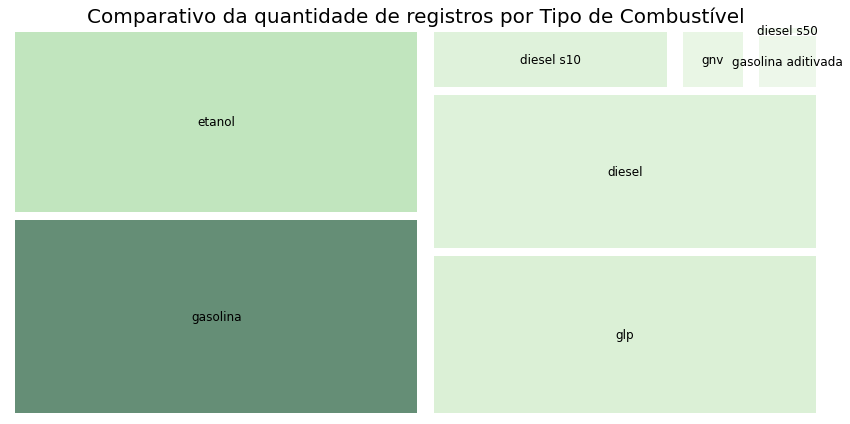

In [11]:
# Definindo o tamanho da figura
plt.figure(figsize=(12,6))

# Fazendo o Treemap
squarify.plot(sizes=df.produto.value_counts(), label=df.produto.value_counts().index,
              color=colors, pad=True, alpha=0.6, text_kwargs={'fontsize': 12});

# Adicionando um título
plt.title('Comparativo da quantidade de registros por Tipo de Combustível', fontsize=20)

# Removendo os eixos
plt.axis('off');

# Ajustando o gráfico
plt.tight_layout()


Como podemos ver no gráfico acima, a maior parte dos registros é da gasolina, seguida de perto do etanol que são os 2 combutíveis mais usados em veiculos, em seguida temos o GLP, mais conhecido como gás de cozinha, também temos o diesel comum (S-500) com teor de enxofre de 500 ppm, e o S-10 com teor máximo de 10 ppm. Há também o GNV (que normalmente é mais economico), gasolina aditivada que ajudam a manter limpo o sistema de alimentação do veículo e diesel s50

In [12]:
df.produto.value_counts() / len(df) * 100

gasolina              26.47870
etanol                24.72505
glp                   20.72545
diesel                20.12840
diesel s10             4.96855
gnv                    1.52005
gasolina aditivada     1.34730
diesel s50             0.10650
Name: produto, dtype: float64

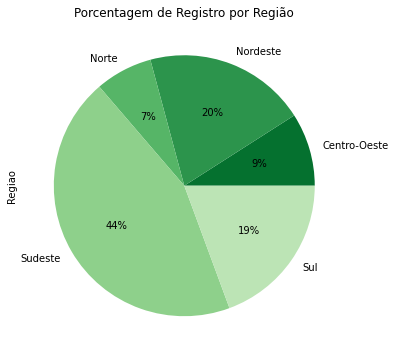

In [80]:
plt.figure(figsize=(12,6))
plt.title('Porcentagem de Registro por Região')

ax = (df.Regiao.value_counts()/len(df)*100).sort_index().plot(kind="pie", autopct='%1.0f%%')

In [85]:
mean_comb_per_regiao = df.groupby(['ano','Regiao']).preco_venda.mean()
mean_comb_per_regiao

ano   Regiao      
2004  Centro-Oeste     6.129079
      Nordeste         5.267097
      Norte            7.754106
      Sudeste          5.079238
      Sul              6.109718
2006  Centro-Oeste     6.894416
      Nordeste         5.818449
      Norte           10.693873
      Sudeste          6.298011
      Sul              6.450116
2007  Centro-Oeste    10.051250
      Nordeste         6.730881
      Norte            8.852474
      Sudeste          6.955684
      Sul              8.325455
2008  Centro-Oeste    13.291110
      Nordeste         7.736259
      Norte           11.869757
      Sudeste          9.264393
      Sul             10.910364
2009  Centro-Oeste    13.072946
      Nordeste         7.977191
      Norte           11.742931
      Sudeste          9.504419
      Sul             11.133109
2010  Centro-Oeste    13.851254
      Nordeste         8.235277
      Norte           11.746173
      Sudeste         10.003578
      Sul             11.861944
2011  Centro-Oeste   

In [86]:
mean_comb_per_regiao = mean_comb_per_regiao.unstack(level='Regiao')
mean_comb_per_regiao

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
ano,,,,,
2004,6.129079,5.267097,7.754106,5.079238,6.109718
2006,6.894416,5.818449,10.693873,6.298011,6.450116
2007,10.051250,6.730881,8.852474,6.955684,8.325455
2008,13.291110,7.736259,11.869757,9.264393,10.910364
2009,13.072946,7.977191,11.742931,9.504419,11.133109
2010,13.851254,8.235277,11.746173,10.003578,11.861944
2011,15.567313,9.363654,13.578932,10.655837,11.740746
2012,15.944362,9.317068,13.939839,11.028248,12.612969
2014,16.226521,10.713085,15.973845,11.629691,12.783233


In [120]:
# Definindo titulo e label pra deixar o codigo mais limpo
titulo = 'Média de Preço de Gasolina com o Passar dos Anos Por Regiao'
xlabel = 'Ano'
ylabel = 'Média de Preço do Combustível'
colormap = 'Dark2'

<AxesSubplot:title={'center':'Média de Preço de Gasolina com o Passar dos Anos Por Regiao'}, xlabel='Ano', ylabel='Média de Preço do Combustível'>

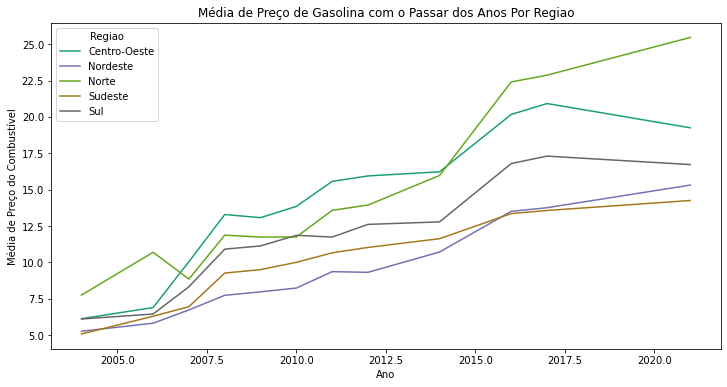

In [121]:
mean_comb_per_regiao.plot(figsize = (12,6), title = titulo,
                          xlabel = xlabel,
                          ylabel = ylabel,
                          colormap = colormap)

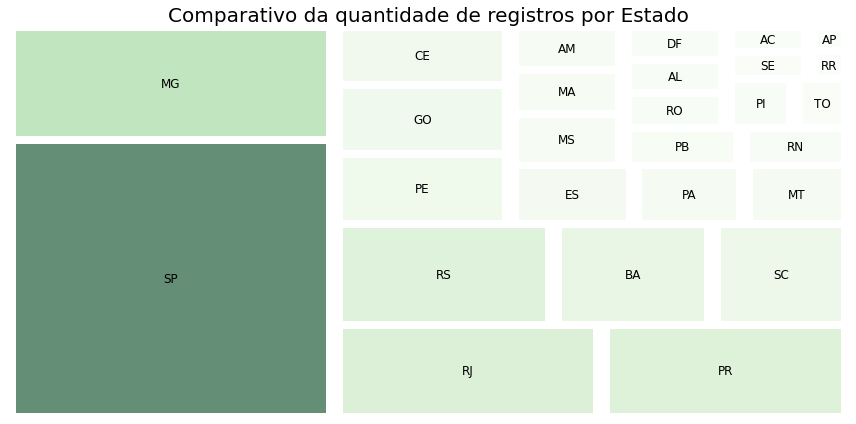

In [13]:
# Definindo o tamanho da figura
plt.figure(figsize=(12,6))

# Fazendo o Treemap
squarify.plot(sizes=df.sigla_uf.value_counts(), label=df.sigla_uf.value_counts().index,
              color=colors, pad=True, alpha=0.6, text_kwargs={'fontsize': 12});

# Adicionando um título
plt.title('Comparativo da quantidade de registros por Estado', fontsize=20)

# Removendo os eixos
plt.axis('off');

# Ajustando o gráfico
plt.tight_layout()


E como era de se esperar o estado de São Paulo lidera a concentração de combustível no país, mas é surpreendente o tamanho que ele está de Minas Gerais que vem logo em seguida, talvez no conjunto de dados completo, a diferença não seja tão grande, mas aqui estamos com uma amostra de dois milhões de registros 

In [14]:
# E abaixo é mostrado a porcentagem da quantidade de registros por Estado
uf_porcentagem = df.sigla_uf.value_counts() / len(df) * 100
uf_porcentagem = pd.DataFrame(uf_porcentagem)
uf_porcentagem

,sigla_uf
SP,27.60185
MG,11.24680
RJ,7.45830
PR,6.91785
RS,6.77380
BA,4.93870
SC,4.23490
PE,3.75420
GO,3.70255
CE,3.08085


In [15]:
df['unidade_medida'].unique()

array(['R$/litro', 'R$/13kg', 'R$/m3'], dtype=object)

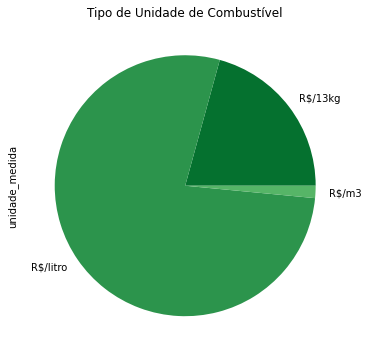

In [16]:
plt.figure(figsize=(12,6))
plt.title('Tipo de Unidade de Combustível')

ax = (df.unidade_medida.value_counts()/len(df)*100).sort_index().plot(kind="pie", rot=0)

E a forma mais usada para compra ou venda de combustivel, onde temos o preço por livro, mas há tambem a medida por metros cubicos que é usada principalmente com gnv e R$13kg que é mais usada com o gás que temos em nossa casa

In [17]:
top10_bandeira = df.bandeira_revenda.value_counts().head(10)
top10_bandeira = pd.DataFrame(top10_bandeira)
top10_bandeira = top10_bandeira.reset_index()
top10_bandeira.rename(columns={'index': 'Bandeira', 'bandeira_revenda': 'Quantidade de Registros'}, inplace= True)
top10_bandeira

,Bandeira,Quantidade de Registros
0,BRANCA,925659
1,PETROBRAS DISTRIBUIDORA S.A.,362165
2,IPIRANGA,195235
3,RAIZEN,158670
4,CBPI,92707
5,COSAN LUBRIFICANTES,73398
6,ALESAT,37560
7,SABBÁ,9685
8,SP,9434
9,LIQUIGÁS,9252


Os postos são chamados bandeira branca por não ser filiado a uma dessas famosas marcas internacionais ou nacionais como Shell, Petrobrás, Ipiranga, Ale. E, ele então, ou tem uma marca própria, ou não tem marca nenhuma. Ele simplesmente compra o etanol e os derivados de petróleo da refinaria ou do fornecedor que oferecer o melhor preço e qualidade.

In [26]:
mean_comb_per_year = df.groupby('ano').mean('preco_venda').reset_index()
mean_comb_per_year

,ano,preco_venda
0,2004,5.397696
1,2006,6.485176
2,2007,7.359959
3,2008,9.537053
4,2009,9.684570
5,2010,10.158248
6,2011,10.910504
7,2012,11.249403
8,2014,11.970822
9,2016,15.056798


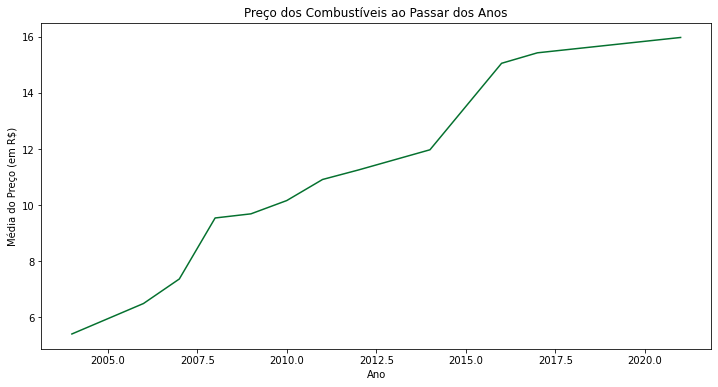

In [122]:
plt.figure(figsize=(12,6))
plt.title('Preço dos Combustíveis ao Passar dos Anos')
plt.xlabel('Ano')
plt.ylabel('Média do Preço (em R$)')
plt.plot( mean_comb_per_year.ano, mean_comb_per_year.preco_venda)

Como podemos observar, conforme os anos vão passando, o preço dos combustíveis vai aumentando e um dos vários fatores para isso é a cotação no petroleo no mercado internacional

In [38]:
mean_comb_per_year['CrescimentoAnual'] = mean_comb_per_year.preco_venda.pct_change()

In [40]:
mean_comb_per_year

,ano,preco_venda,CrescimentoAnual
0,2004,5.397696,NaN
1,2006,6.485176,0.201471
2,2007,7.359959,0.134890
3,2008,9.537053,0.295802
4,2009,9.684570,0.015468
5,2010,10.158248,0.048911
6,2011,10.910504,0.074054
7,2012,11.249403,0.031062
8,2014,11.970822,0.064130
9,2016,15.056798,0.257791


Na tabela acima, temos o ano, o preço de venda em *MÉDIA* e o crescimento do preço em percentual conforme o passar dos anos e veja que a maior diferença na média foi do ano de 2007 pra 2008, seguido de 2014 pra 2016 (não sei dizer o motivo de não ter dados do ano de 2015)

In [72]:
mean_comb_per_uf = df.groupby(['ano', 'sigla_uf']).mean('preco_venda')
mean_comb_per_uf

preco_venda
ano  sigla_uf             
2004 AC           6.739531
     AL           3.026522
     AM           7.898699
     AP           5.295962
     BA           6.308110
...                    ...
2021 RS          19.655810
     SC           7.174047
     SE          13.096221
     SP          13.179170
     TO          37.761004

[324 rows x 1 columns]

E conforme fizemos anteriormente, na tabela acima temos um agrupamento por ano e por Estado, onde é possivel visualizar a média de todos os combustiveis em seus respectivos anos e Estados 

In [46]:
dfSP = df.query('sigla_uf=="SP"')
dfSP

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_venda
2,2012,SP,3550308,PENHA,03631-000,"RUA GUAIAUNA,751",05.052.272/0001-59,AUTO POSTO CIDADE QUATRO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2012-01-02,diesel s50,R$/litro,2.099
4,2012,SP,3530607,PONTE GRANDE,08775-000,"AVENIDA LOTHAR WALDEMAR HOENNE,1200",62.071.196/0001-62,AUTO POSTO MOGI DAS CRUZES LTDA,PETROBRAS DISTRIBUIDORA S.A.,2012-01-02,diesel s50,R$/litro,2.099
5,2012,SP,3530508,JARDIM GATOLANDIA,13731-000,"AVENIDA CHRISTOVAM LIMA GUEDES,1653",06.208.892/0001-05,AUTO POSTO IRMAOS VILA LTDA - EPP,BRANCA,2012-01-02,diesel s50,R$/litro,1.979
6,2012,SP,3530508,ZONA RURAL,13730-000,"RODOVIA SP 340,S/N KM 263",46.396.990/0001-20,AUTO POSTO MOCOCAO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2012-01-02,diesel s50,R$/litro,1.979
23,2012,SP,3527108,CENTRO,16400-101,"RUA FLORIANO PEIXOTO,1435",02.787.519/0001-97,PIT STOP AUTO POSTO DE LINS LTDA,PETROBRAS DISTRIBUIDORA S.A.,2012-01-03,diesel s50,R$/litro,1.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2021,SP,3550308,SÃO JOÃO CLIMACO,04255-140,"RUA TAMUATÁ,20",44.029.403/0001-39,AUTO POSTO GLAUSSEA LTDA,RAIZEN,2021-03-30,gasolina aditivada,R$/litro,5.799
1999996,2021,SP,3550308,SAO JOAO CLIMACO,04244-000,"ESTRADA DAS LAGRIMAS,3766",47.458.690/0001-90,AUTO POSTO GUSA LTDA,RAIZEN,2021-03-30,gasolina aditivada,R$/litro,5.799
1999997,2021,SP,3550308,JARDIM CELESTE,04169-000,"AVENIDA DO CURSINO,6467",57.978.652/0001-12,AUTO POSTO COMARIS LTDA,BRANCA,2021-03-30,gasolina aditivada,R$/litro,5.177
1999998,2021,SP,3550308,MOINHO VELHO,04284-060,"RUA ILIRIA,105",60.880.408/0001-27,AUTO POSTO CORONEL LTDA,PETROBRAS DISTRIBUIDORA S.A.,2021-03-30,gasolina aditivada,R$/litro,5.999


In [52]:
mean_comb_per_yearSP = dfSP.groupby('ano').mean('preco_venda').reset_index()
mean_comb_per_yearSP

,ano,preco_venda
0,2004,4.318759
1,2006,5.018571
2,2007,6.155859
3,2008,8.588243
4,2009,9.027568
5,2010,9.337572
6,2011,10.119360
7,2012,10.355560
8,2014,10.926078
9,2016,12.186270


In [53]:
mean_comb_per_yearSP['CrescimentoAnual'] = mean_comb_per_yearSP.preco_venda.pct_change()
mean_comb_per_yearSP

,ano,preco_venda,CrescimentoAnual
0,2004,4.318759,NaN
1,2006,5.018571,0.162040
2,2007,6.155859,0.226616
3,2008,8.588243,0.395133
4,2009,9.027568,0.051154
5,2010,9.337572,0.034340
6,2011,10.119360,0.083725
7,2012,10.355560,0.023341
8,2014,10.926078,0.055093
9,2016,12.186270,0.115338


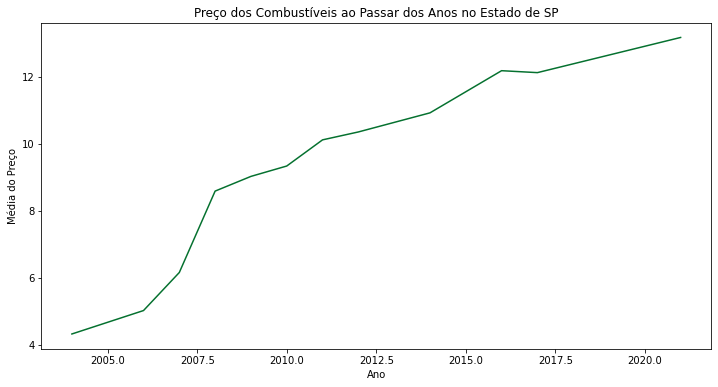

In [54]:
plt.figure(figsize=(12,6))
plt.title('Preço dos Combustíveis ao Passar dos Anos no Estado de SP')
plt.xlabel('Ano')
plt.ylabel('Média do Preço')
plt.plot( mean_comb_per_yearSP.ano, mean_comb_per_yearSP.preco_venda)

In [60]:
dfm3 = df.query('unidade_medida=="R$/m3"')
dfm3

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_venda
416639,2007,AL,2704302,PINHEIRO,57057-450,"AVENIDA FERNANDES LIMA,2501",07.247.381/0001-57,AUTO POSTO FAROL LTDA,RAIZEN,2007-01-02,gnv,R$/m3,1.440
416640,2007,AL,2704302,GRUTA DE LOURDES,57052-000,"AVENIDA FERNANDES LIMA,2946",07.035.310/0001-90,AUTO POSTO PETRÓLEO E GÁS LTDA.,BRANCA,2007-01-02,gnv,R$/m3,1.440
416641,2007,PE,2606804,CENTRO,53610-296,"RODOVIA BR 101 NORTE,SN KM 43498",24.140.204/0001-96,BARROS & ALMEIDA LTDA,IPIRANGA,2007-01-02,gnv,R$/m3,1.448
416642,2007,PE,2606804,CRUZ DE REBOUCAS,53610-296,"AVENIDA BARAO VERA CRUZ,975",69.943.686/0004-01,CEMOPEL CM PETROLEO LTDA,COSAN LUBRIFICANTES,2007-01-02,gnv,R$/m3,1.448
416643,2007,PB,2510808,ZONA RURAL,58706-500,"RODOVIA BR 230,S/N KM 293",00.533.024/0001-06,TIGRAO COMBUSTIVEIS LTDA,BRANCA,2007-01-02,gnv,R$/m3,1.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447035,2004,AL,2704302,TABOLEIRO DOS MARTINS,57080-000,"AVENIDA DURVAL DE GOES MONTEIRO,9110",01.593.645/0001-48,AFFONSO & LEAO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2004-06-01,gnv,R$/m3,1.084
447036,2004,AL,2704302,PAJUÇARA,57030-000,"RUA JANGADEIROS ALAGOANOS,460 0",12.192.084/0002-72,P. R. A. MELO & CIA LTDA,PETROBRAS DISTRIBUIDORA S.A.,2004-06-01,gnv,R$/m3,1.084
447037,2004,BA,2927408,PIRAJÁ,40100-000,"RODOVIA BR 324,S/N KM 09",02.558.546/0001-98,POSTO PORTOSECO DE COMBUSTIVEIS LTDA,PETROBRAS DISTRIBUIDORA S.A.,2004-06-01,gnv,R$/m3,1.079
447038,2004,BA,2927408,AGUAS CLARAS,41310-450,"RODOVIA BR 324,S/N KM 12",04.628.571/0001-26,CLERALDO ANDRADE REZENDE DE SALVADOR,COSAN LUBRIFICANTES,2004-06-01,gnv,R$/m3,1.079


In [62]:
dfm3.produto.unique()

array(['gnv'], dtype=object)

In [63]:
df13kg = df.query('unidade_medida=="R$/13kg"')
df13kg.head(5)

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_venda
2130,2007,PR,4128104,ZONA ARMAZÉM,87504-530,"AVENIDA PORTUGAL,5185",05.004.708/0001-34,M. M. DIAS - GAS,BRANCA,2007-01-02,glp,R$/13kg,35.0
2131,2007,PR,4128104,JARDIM PANORAMA,87501-460,"AVENIDA LIBERDADE,3236",05.684.727/0001-59,PANORAMA COMERCIO DE GAS LTDA,BRANCA,2007-01-02,glp,R$/13kg,35.0
2132,2007,PR,4128104,ZONA VI,87503-100,"PRACA TAMOYO,2993",05.765.695/0001-16,KIGÁS COMÉRCIO DE GÁS LTDA,BRANCA,2007-01-02,glp,R$/13kg,35.0
2133,2007,PR,4128104,ZONA VII,87503-470,"AVENIDA RONDONIA,3615",07.816.235/0001-03,LUIS HENRIQUE DE SOUZA MATOS,BRANCA,2007-01-02,glp,R$/13kg,35.0
2134,2007,PR,4128104,,00000-000,"RUA GOV NEY BRAGA, 4770,S/N",82.439.092/0001-75,APAJUL COM DE APAR E ACESS DOM LTDA,BRANCA,2007-01-02,glp,R$/13kg,35.0


In [64]:
df13kg.produto.unique()

array(['glp'], dtype=object)